# API 예보 시간
- Base_time : 0200, 0500, 0800, 1100, 1400, 1700, 2000, 2300 (1일 8회)
- API 제공 시간(~이후) : 02:10, 05:10, 08:10, 11:10, 14:10, 17:10, 20:10, 23:10
- 관측은 3시간단위로 관측하되, 관측시간마다 1시간단위의 예측을 제공함.

In [1]:
import pandas as pd
import json
import requests as req
from bs4 import BeautifulSoup

In [2]:
url = "http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getVilageFcst"

params ={ 'ServiceKey' : 'BFIFHjOUqUTQx12WgHeIlWEeiwSU72YuzHACp/FXg+fHQYDOwtdZfzVX2Rf5rEN9/YRBtlkU1LaWMuC0IUeOsg==',
         'pageNo' : '1',
         'numOfRows' : '10000',
         'dataType' : 'JSON',
         'base_date' : '20221024',
         'base_time' : '1100',
         'nx' : '59',
         'ny' : '74' }

In [3]:
res = req.get(url, params=params)
print(res.text)

{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"baseDate":"20221024","baseTime":"1100","category":"TMP","fcstDate":"20221024","fcstTime":"1200","fcstValue":"15","nx":59,"ny":74},{"baseDate":"20221024","baseTime":"1100","category":"UUU","fcstDate":"20221024","fcstTime":"1200","fcstValue":"2.1","nx":59,"ny":74},{"baseDate":"20221024","baseTime":"1100","category":"VVV","fcstDate":"20221024","fcstTime":"1200","fcstValue":"-4.3","nx":59,"ny":74},{"baseDate":"20221024","baseTime":"1100","category":"VEC","fcstDate":"20221024","fcstTime":"1200","fcstValue":"334","nx":59,"ny":74},{"baseDate":"20221024","baseTime":"1100","category":"WSD","fcstDate":"20221024","fcstTime":"1200","fcstValue":"4.8","nx":59,"ny":74},{"baseDate":"20221024","baseTime":"1100","category":"SKY","fcstDate":"20221024","fcstTime":"1200","fcstValue":"1","nx":59,"ny":74},{"baseDate":"20221024","baseTime":"1100","category":"PTY","fcstDate":"20221024","fcstTime"

In [4]:
result = json.loads(res.text)
result

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'},
  'body': {'dataType': 'JSON',
   'items': {'item': [{'baseDate': '20221024',
      'baseTime': '1100',
      'category': 'TMP',
      'fcstDate': '20221024',
      'fcstTime': '1200',
      'fcstValue': '15',
      'nx': 59,
      'ny': 74},
     {'baseDate': '20221024',
      'baseTime': '1100',
      'category': 'UUU',
      'fcstDate': '20221024',
      'fcstTime': '1200',
      'fcstValue': '2.1',
      'nx': 59,
      'ny': 74},
     {'baseDate': '20221024',
      'baseTime': '1100',
      'category': 'VVV',
      'fcstDate': '20221024',
      'fcstTime': '1200',
      'fcstValue': '-4.3',
      'nx': 59,
      'ny': 74},
     {'baseDate': '20221024',
      'baseTime': '1100',
      'category': 'VEC',
      'fcstDate': '20221024',
      'fcstTime': '1200',
      'fcstValue': '334',
      'nx': 59,
      'ny': 74},
     {'baseDate': '20221024',
      'baseTime': '1100',
      'category': 'WSD',
      'fcs

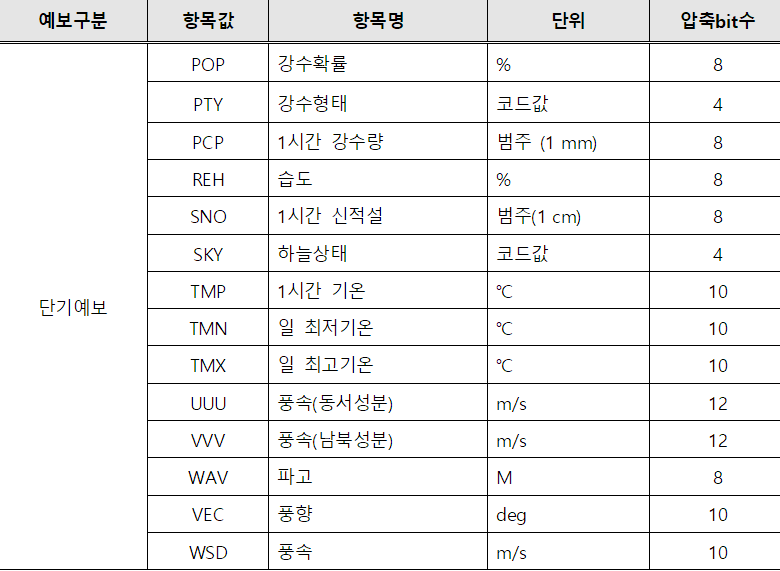

# 6시간 이내 정보들만 전처리하기

# 단위 
TMP : 1시간 기온
UUU : 풍속(동서성분) m/s
VVV : 풍속(남북성분) m/s
VEC : 풍향 deg
WSD : 풍속 m/s

SKY : 하늘상태
코드 (1) = 맑음
코드 (3) = 구름많음 
코드 (4) = 흐림

PTY : 강수형태 
코드 (0) = 없음
코드 (1) = 비
코드 (2) = 비/눈
코드 (3) = 눈
코드 (5) = 빗방울
코드 (6) = 빗방울눈날림
코드 (7) = 눈날림

POP : 강수확률 %
WAV : 파고 M
PCP : 1시간 강수량 -> 범주 1mm
0.1~1.0mm 미만 = 1.0mm로 표시
1.0~.30.0mm 미만 = 실수값 + mm 로 표시
30.0~50.0mm 미만 = 30.0~50.0mm로 표시
50.0mm 이상 = 50.0mm로 표시
-, null, 0 값 = 강수없음

REH : 습도 %
SNO : 1시간 신적설 -> 범주 1cm

=>  1시간 단위로 예측

In [5]:
# 가져온 API 안의 정보들
result

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'},
  'body': {'dataType': 'JSON',
   'items': {'item': [{'baseDate': '20221024',
      'baseTime': '1100',
      'category': 'TMP',
      'fcstDate': '20221024',
      'fcstTime': '1200',
      'fcstValue': '15',
      'nx': 59,
      'ny': 74},
     {'baseDate': '20221024',
      'baseTime': '1100',
      'category': 'UUU',
      'fcstDate': '20221024',
      'fcstTime': '1200',
      'fcstValue': '2.1',
      'nx': 59,
      'ny': 74},
     {'baseDate': '20221024',
      'baseTime': '1100',
      'category': 'VVV',
      'fcstDate': '20221024',
      'fcstTime': '1200',
      'fcstValue': '-4.3',
      'nx': 59,
      'ny': 74},
     {'baseDate': '20221024',
      'baseTime': '1100',
      'category': 'VEC',
      'fcstDate': '20221024',
      'fcstTime': '1200',
      'fcstValue': '334',
      'nx': 59,
      'ny': 74},
     {'baseDate': '20221024',
      'baseTime': '1100',
      'category': 'WSD',
      'fcs

In [6]:
result.keys()

dict_keys(['response'])

In [7]:
result['response']

{'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'},
 'body': {'dataType': 'JSON',
  'items': {'item': [{'baseDate': '20221024',
     'baseTime': '1100',
     'category': 'TMP',
     'fcstDate': '20221024',
     'fcstTime': '1200',
     'fcstValue': '15',
     'nx': 59,
     'ny': 74},
    {'baseDate': '20221024',
     'baseTime': '1100',
     'category': 'UUU',
     'fcstDate': '20221024',
     'fcstTime': '1200',
     'fcstValue': '2.1',
     'nx': 59,
     'ny': 74},
    {'baseDate': '20221024',
     'baseTime': '1100',
     'category': 'VVV',
     'fcstDate': '20221024',
     'fcstTime': '1200',
     'fcstValue': '-4.3',
     'nx': 59,
     'ny': 74},
    {'baseDate': '20221024',
     'baseTime': '1100',
     'category': 'VEC',
     'fcstDate': '20221024',
     'fcstTime': '1200',
     'fcstValue': '334',
     'nx': 59,
     'ny': 74},
    {'baseDate': '20221024',
     'baseTime': '1100',
     'category': 'WSD',
     'fcstDate': '20221024',
     'fcstTime': '1200',
     

In [8]:
print("category" in result)

False


In [9]:
data = result["response"]["body"]["items"]["item"]
data

[{'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'TMP',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '15',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'UUU',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '2.1',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VVV',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '-4.3',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VEC',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '334',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'WSD',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '4.8',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'SKY',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '1',
  'nx': 59,
  'ny': 74},
 {'baseDate': '202

In [10]:
# 1시간 후 예측
data1 = []
for i in range(12) :
    data1.append(data[i])
data1

[{'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'TMP',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '15',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'UUU',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '2.1',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VVV',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '-4.3',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VEC',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '334',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'WSD',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '4.8',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'SKY',
  'fcstDate': '20221024',
  'fcstTime': '1200',
  'fcstValue': '1',
  'nx': 59,
  'ny': 74},
 {'baseDate': '202

In [11]:
# 2시간 후 예측
data2 = []
for i in range(12, 24) :
    data2.append(data[i])
data2

[{'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'TMP',
  'fcstDate': '20221024',
  'fcstTime': '1300',
  'fcstValue': '15',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'UUU',
  'fcstDate': '20221024',
  'fcstTime': '1300',
  'fcstValue': '2.2',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VVV',
  'fcstDate': '20221024',
  'fcstTime': '1300',
  'fcstValue': '-4.4',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VEC',
  'fcstDate': '20221024',
  'fcstTime': '1300',
  'fcstValue': '333',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'WSD',
  'fcstDate': '20221024',
  'fcstTime': '1300',
  'fcstValue': '4.9',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'SKY',
  'fcstDate': '20221024',
  'fcstTime': '1300',
  'fcstValue': '1',
  'nx': 59,
  'ny': 74},
 {'baseDate': '202

In [12]:
# 3시간 후 예측
data3 = []
for i in range(24, 36) :
    data[i]
    data3.append(data[i])
data3

[{'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'TMP',
  'fcstDate': '20221024',
  'fcstTime': '1400',
  'fcstValue': '15',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'UUU',
  'fcstDate': '20221024',
  'fcstTime': '1400',
  'fcstValue': '2.3',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VVV',
  'fcstDate': '20221024',
  'fcstTime': '1400',
  'fcstValue': '-4.3',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VEC',
  'fcstDate': '20221024',
  'fcstTime': '1400',
  'fcstValue': '332',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'WSD',
  'fcstDate': '20221024',
  'fcstTime': '1400',
  'fcstValue': '4.9',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'SKY',
  'fcstDate': '20221024',
  'fcstTime': '1400',
  'fcstValue': '1',
  'nx': 59,
  'ny': 74},
 {'baseDate': '202

In [13]:
# 4시간 후 예측
data4 = []
for i in range(36, 48) :
    data[i]
    data4.append(data[i])
data4

[{'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'TMP',
  'fcstDate': '20221024',
  'fcstTime': '1500',
  'fcstValue': '15',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'UUU',
  'fcstDate': '20221024',
  'fcstTime': '1500',
  'fcstValue': '2.3',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VVV',
  'fcstDate': '20221024',
  'fcstTime': '1500',
  'fcstValue': '-4.3',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VEC',
  'fcstDate': '20221024',
  'fcstTime': '1500',
  'fcstValue': '332',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'WSD',
  'fcstDate': '20221024',
  'fcstTime': '1500',
  'fcstValue': '4.9',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'SKY',
  'fcstDate': '20221024',
  'fcstTime': '1500',
  'fcstValue': '1',
  'nx': 59,
  'ny': 74},
 {'baseDate': '202

In [14]:
# 5시간 후 예측
data5 = []
for i in range(48, 60) :
    data[i]
    data5.append(data[i])
data5

[{'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'TMX',
  'fcstDate': '20221024',
  'fcstTime': '1500',
  'fcstValue': '15.0',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'TMP',
  'fcstDate': '20221024',
  'fcstTime': '1600',
  'fcstValue': '14',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'UUU',
  'fcstDate': '20221024',
  'fcstTime': '1600',
  'fcstValue': '2.1',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VVV',
  'fcstDate': '20221024',
  'fcstTime': '1600',
  'fcstValue': '-4',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VEC',
  'fcstDate': '20221024',
  'fcstTime': '1600',
  'fcstValue': '332',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'WSD',
  'fcstDate': '20221024',
  'fcstTime': '1600',
  'fcstValue': '4.5',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20

In [15]:
# 6시간 후 예측
data6 = []
for i in range(60, 72) :
    data[i]
    data6.append(data[i])
data6

[{'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'SNO',
  'fcstDate': '20221024',
  'fcstTime': '1600',
  'fcstValue': '적설없음',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'TMP',
  'fcstDate': '20221024',
  'fcstTime': '1700',
  'fcstValue': '12',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'UUU',
  'fcstDate': '20221024',
  'fcstTime': '1700',
  'fcstValue': '1.6',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VVV',
  'fcstDate': '20221024',
  'fcstTime': '1700',
  'fcstValue': '-2.5',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'VEC',
  'fcstDate': '20221024',
  'fcstTime': '1700',
  'fcstValue': '327',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20221024',
  'baseTime': '1100',
  'category': 'WSD',
  'fcstDate': '20221024',
  'fcstTime': '1700',
  'fcstValue': '3',
  'nx': 59,
  'ny': 74},
 {'baseDate': '20

In [16]:
import pandas as pd

In [17]:
# 1시간후 데이터 판다스 불러오기
data1= pd.DataFrame(data1)
data1

,baseDate,baseTime,category,fcstDate,fcstTime,fcstValue,nx,ny
0,20221024,1100,TMP,20221024,1200,15,59,74
1,20221024,1100,UUU,20221024,1200,2.1,59,74
2,20221024,1100,VVV,20221024,1200,-4.3,59,74
3,20221024,1100,VEC,20221024,1200,334,59,74
4,20221024,1100,WSD,20221024,1200,4.8,59,74
5,20221024,1100,SKY,20221024,1200,1,59,74
6,20221024,1100,PTY,20221024,1200,0,59,74
7,20221024,1100,POP,20221024,1200,0,59,74
8,20221024,1100,WAV,20221024,1200,0,59,74
9,20221024,1100,PCP,20221024,1200,강수없음,59,74


In [18]:
data2= pd.DataFrame(data2)
data2

,baseDate,baseTime,category,fcstDate,fcstTime,fcstValue,nx,ny
0,20221024,1100,TMP,20221024,1300,15,59,74
1,20221024,1100,UUU,20221024,1300,2.2,59,74
2,20221024,1100,VVV,20221024,1300,-4.4,59,74
3,20221024,1100,VEC,20221024,1300,333,59,74
4,20221024,1100,WSD,20221024,1300,4.9,59,74
5,20221024,1100,SKY,20221024,1300,1,59,74
6,20221024,1100,PTY,20221024,1300,0,59,74
7,20221024,1100,POP,20221024,1300,0,59,74
8,20221024,1100,WAV,20221024,1300,0,59,74
9,20221024,1100,PCP,20221024,1300,강수없음,59,74


In [19]:
data3= pd.DataFrame(data3)
data3

,baseDate,baseTime,category,fcstDate,fcstTime,fcstValue,nx,ny
0,20221024,1100,TMP,20221024,1400,15,59,74
1,20221024,1100,UUU,20221024,1400,2.3,59,74
2,20221024,1100,VVV,20221024,1400,-4.3,59,74
3,20221024,1100,VEC,20221024,1400,332,59,74
4,20221024,1100,WSD,20221024,1400,4.9,59,74
5,20221024,1100,SKY,20221024,1400,1,59,74
6,20221024,1100,PTY,20221024,1400,0,59,74
7,20221024,1100,POP,20221024,1400,0,59,74
8,20221024,1100,WAV,20221024,1400,0,59,74
9,20221024,1100,PCP,20221024,1400,강수없음,59,74


In [20]:
data4= pd.DataFrame(data4)
data4

,baseDate,baseTime,category,fcstDate,fcstTime,fcstValue,nx,ny
0,20221024,1100,TMP,20221024,1500,15,59,74
1,20221024,1100,UUU,20221024,1500,2.3,59,74
2,20221024,1100,VVV,20221024,1500,-4.3,59,74
3,20221024,1100,VEC,20221024,1500,332,59,74
4,20221024,1100,WSD,20221024,1500,4.9,59,74
5,20221024,1100,SKY,20221024,1500,1,59,74
6,20221024,1100,PTY,20221024,1500,0,59,74
7,20221024,1100,POP,20221024,1500,0,59,74
8,20221024,1100,WAV,20221024,1500,0,59,74
9,20221024,1100,PCP,20221024,1500,강수없음,59,74


In [21]:
data5= pd.DataFrame(data5)
data5

,baseDate,baseTime,category,fcstDate,fcstTime,fcstValue,nx,ny
0,20221024,1100,TMX,20221024,1500,15.0,59,74
1,20221024,1100,TMP,20221024,1600,14,59,74
2,20221024,1100,UUU,20221024,1600,2.1,59,74
3,20221024,1100,VVV,20221024,1600,-4,59,74
4,20221024,1100,VEC,20221024,1600,332,59,74
5,20221024,1100,WSD,20221024,1600,4.5,59,74
6,20221024,1100,SKY,20221024,1600,1,59,74
7,20221024,1100,PTY,20221024,1600,0,59,74
8,20221024,1100,POP,20221024,1600,0,59,74
9,20221024,1100,WAV,20221024,1600,0,59,74


In [22]:
data6= pd.DataFrame(data6)
data6

,baseDate,baseTime,category,fcstDate,fcstTime,fcstValue,nx,ny
0,20221024,1100,SNO,20221024,1600,적설없음,59,74
1,20221024,1100,TMP,20221024,1700,12,59,74
2,20221024,1100,UUU,20221024,1700,1.6,59,74
3,20221024,1100,VVV,20221024,1700,-2.5,59,74
4,20221024,1100,VEC,20221024,1700,327,59,74
5,20221024,1100,WSD,20221024,1700,3,59,74
6,20221024,1100,SKY,20221024,1700,1,59,74
7,20221024,1100,PTY,20221024,1700,0,59,74
8,20221024,1100,POP,20221024,1700,0,59,74
9,20221024,1100,WAV,20221024,1700,0,59,74
